In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

In [ ]:
zoo=pd.read_csv('/content/Zoo.csv')
zoo.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

In [ ]:
print(zoo.info())
print(zoo.isnull().sum())
print(zoo.describe())
print(zoo.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
animal name    0
h

In [ ]:
print(zoo.nunique())
print(zoo["type"].nunique())
print(zoo["type"].unique())

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64
7
[1 4 2 7 6 5 3]


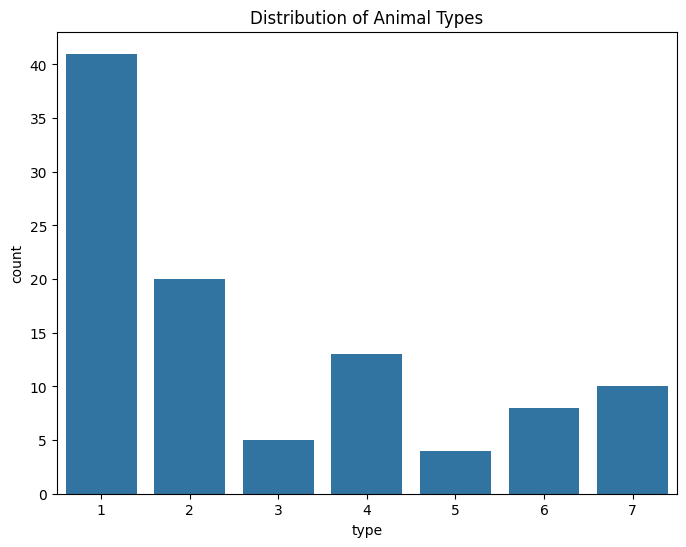

Columns before drop: Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


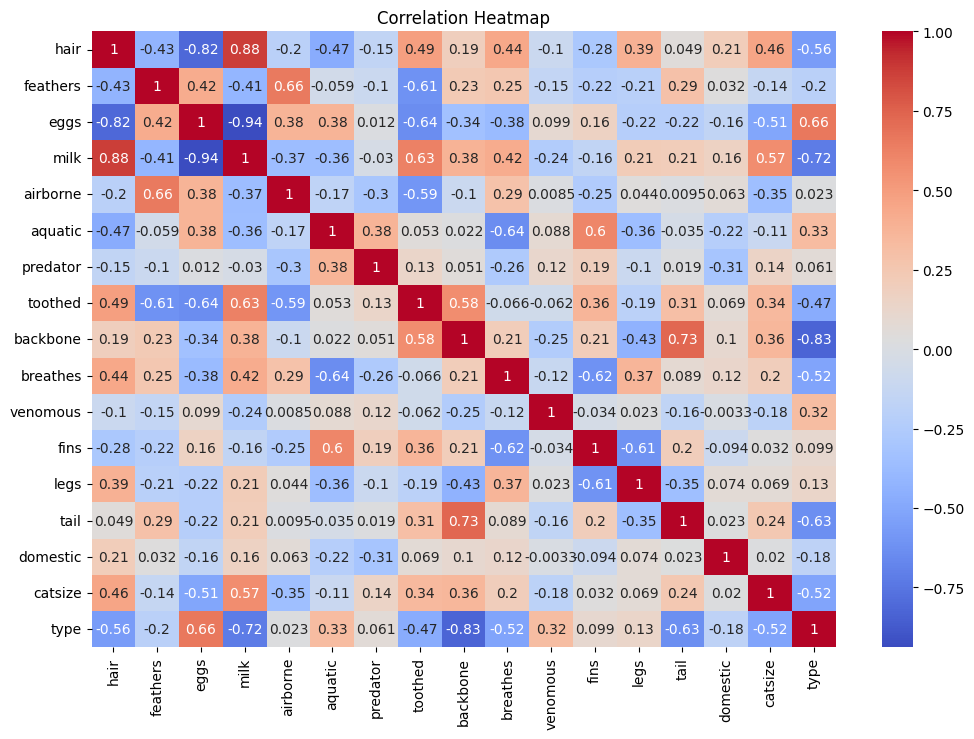

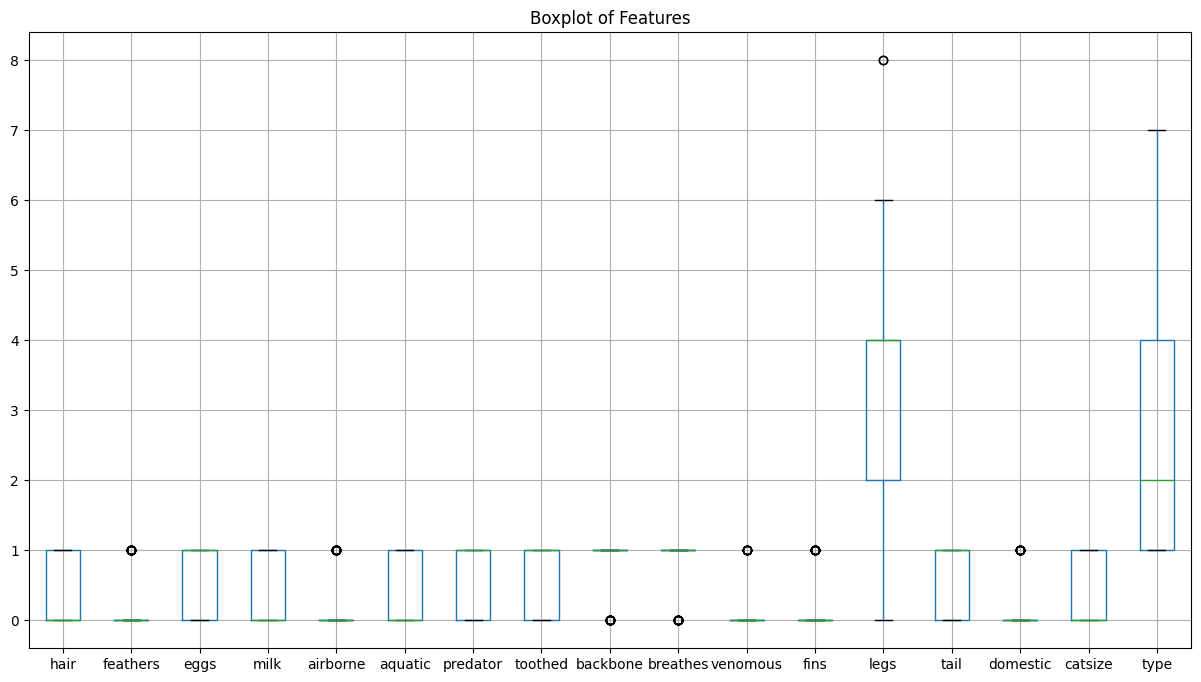

In [ ]:
# Check the distribution of the target variable ('type')
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=zoo)
plt.title('Distribution of Animal Types')
plt.show()

print("Columns before drop:", zoo.columns)

# Drop the 'animal name' column as it is not useful for classification
zoo = zoo.drop('animal name', axis=1,errors='ignore')

# Check correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(zoo.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Check for outliers (using boxplots for numerical features)
plt.figure(figsize=(15, 8))
zoo.boxplot()
plt.title('Boxplot of Features')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1-Score: 0.93


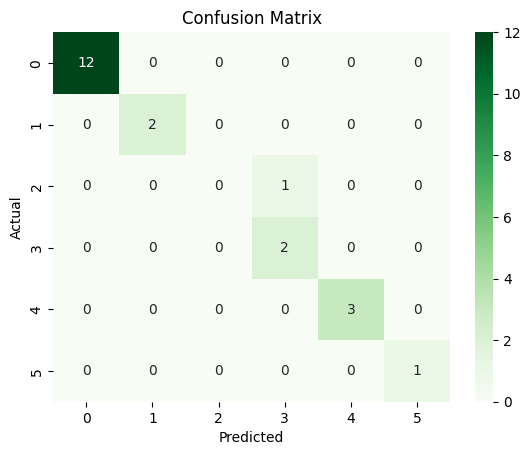

In [ ]:
#split the data into features (X) and the target variable (y)
X = zoo.iloc[:,1:-1]   # Features (all columns except the first and last)
y = zoo['type']    # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement the K-Nearest Neighbours algorithm
# Choose an appropriate value for K (K=5) and distance metric (Euclidean distance)
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

# Train the KNN model on the training dataset
knn.fit(X_train_scaled, y_train)

# Evaluate the classifier's performance on the testing set
# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


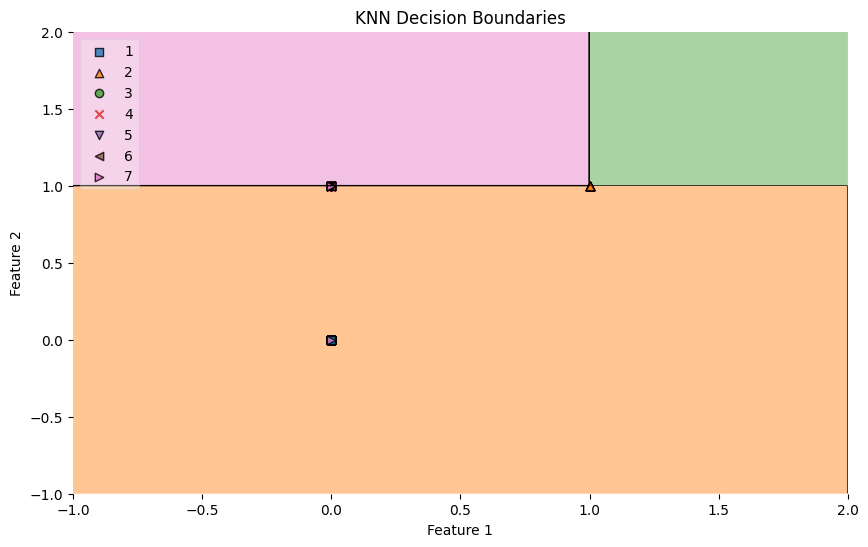

In [ ]:
# Visualize the decision boundaries (for 2 features)
# Select two features for visualization
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]

knn_2d = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2d.fit(X_train_2d, y_train)

plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_2d.values, y_train.values, clf=knn_2d, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundaries')
plt.show()

In [ ]:
#Interview Questions


#1. What are the key hyperparameters in KNN?
# ANS :The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm are:

#1.Number of Neighbors (n_neighbors):
  #This is the most important hyperparameter in KNN.
  #It determines the number of nearest neighbors to consider when making a prediction.
  #A smaller value of k (e.g., 1 or 3) makes the model more sensitive to noise, while a larger value of k (e.g., 10 or 20) makes the model more robust but may smooth out important patterns.
  #The optimal value of k is typically found using techniques like cross-validation.

#2.Distance Metric:
  #The distance metric defines how the distance between data points is calculated.
  #Common distance metrics include:
  #Euclidean Distance (default): Suitable for continuous variables.
  #Manhattan Distance: Useful for high-dimensional data.
  #Minkowski Distance: A generalization of Euclidean and Manhattan distances.
  #Cosine Similarity: Useful for text or high-dimensional sparse data.
  #The choice of distance metric depends on the nature of the data and the problem.

#3.Weights:
  #This hyperparameter determines how the contributions of the neighbors are weighted.
  #Options include:
    #Uniform: All neighbors contribute equally to the prediction.
    #Distance: Neighbors that are closer to the query point contribute more to the prediction.
  #Using weights='distance' can improve performance when the data has varying densities.


#2. What distance metrics can be used in KNN?
#ANS : The KNN algorithm can use various distance metrics to measure the similarity between data points. The choice of distance metric depends on the nature of the data and the problem. Common distance metrics include:

#1.Euclidean Distance:
  #The most commonly used distance metric.
  #Formula:  d(x,y)= (∑n(x−y)2)^1/2
  #Suitable for continuous variables and low-dimensional data.

#2.Manhattan Distance:
   #Also known as "city block" distance.
   #Formula: d(x,y)= ∑ |Xi-Yi|
   #Useful for high-dimensional data or when the data has many categorical features.

#3.Cosine Similarity:
   #Measures the cosine of the angle between two vectors.
   #Formula:  cosine(x,y)= (X*Y/||X||||Y||)
   #Useful for text data or high-dimensional sparse data where the magnitude of the vectors is less important than the direction.

